In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\userspace\daya\python\proj\Dataset-Mental-Disorders.csv')


In [3]:
df.head(2)

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression


In [4]:
# Rename the column 'Optimisim' to 'Optimism'
df.rename(columns={'Optimisim': 'Optimism'}, inplace=True)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient Number       120 non-null    object
 1   Sadness              120 non-null    object
 2   Euphoric             120 non-null    object
 3   Exhausted            120 non-null    object
 4   Sleep dissorder      120 non-null    object
 5   Mood Swing           120 non-null    object
 6   Suicidal thoughts    120 non-null    object
 7   Anorxia              120 non-null    object
 8   Authority Respect    120 non-null    object
 9   Try-Explanation      120 non-null    object
 10  Aggressive Response  120 non-null    object
 11  Ignore & Move-On     120 non-null    object
 12  Nervous Break-down   120 non-null    object
 13  Admit Mistakes       120 non-null    object
 14  Overthinking         120 non-null    object
 15  Sexual Activity      120 non-null    object
 16  Concentr

## PLOTS - Before pre-processing

### Distribution of Sadness


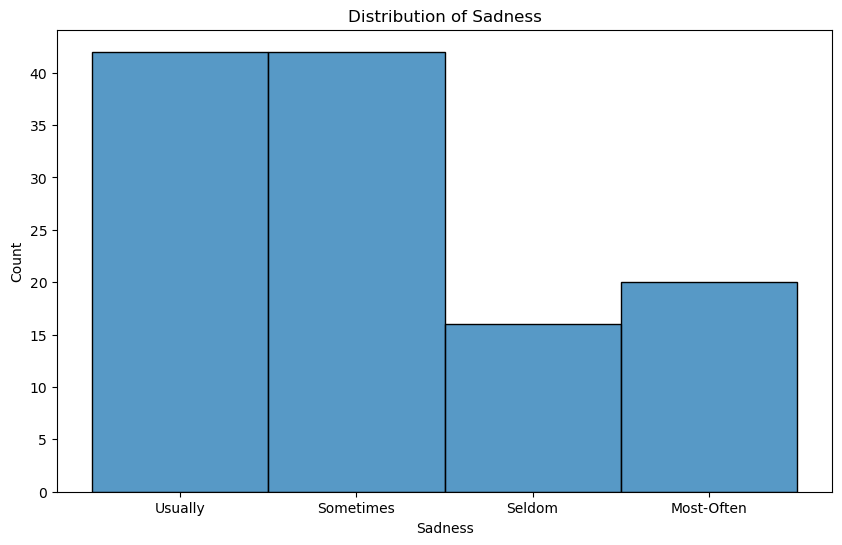

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Sadness', bins=3, kde=False)
plt.title('Distribution of Sadness')
plt.show()

### Histograms of Concentration and Optimism


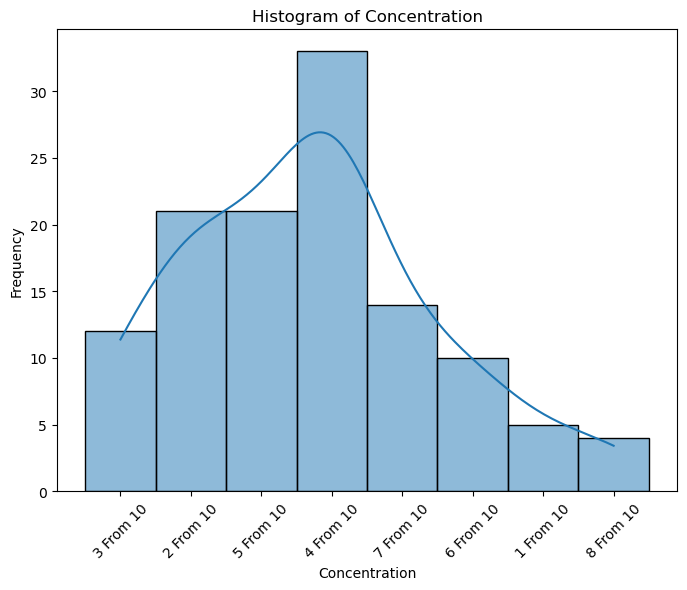

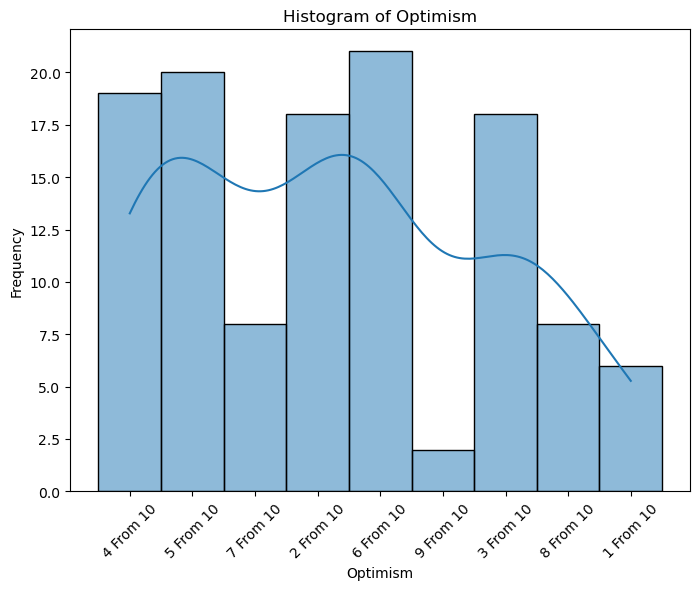

In [7]:
numerical_features = ['Concentration', 'Optimism']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    ax = sns.histplot(df[feature], bins=20, kde=True)
    ax.set_title(f'Histogram of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x-axis labels
    plt.show()


### Countplots of Categorical Features


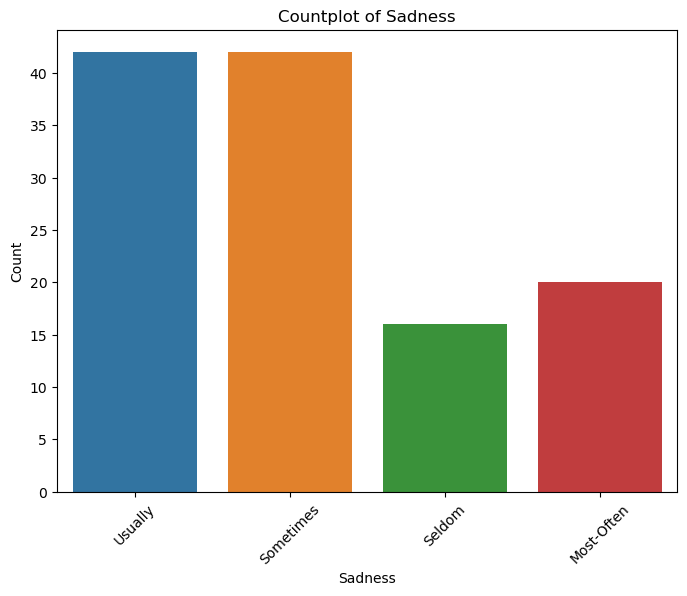

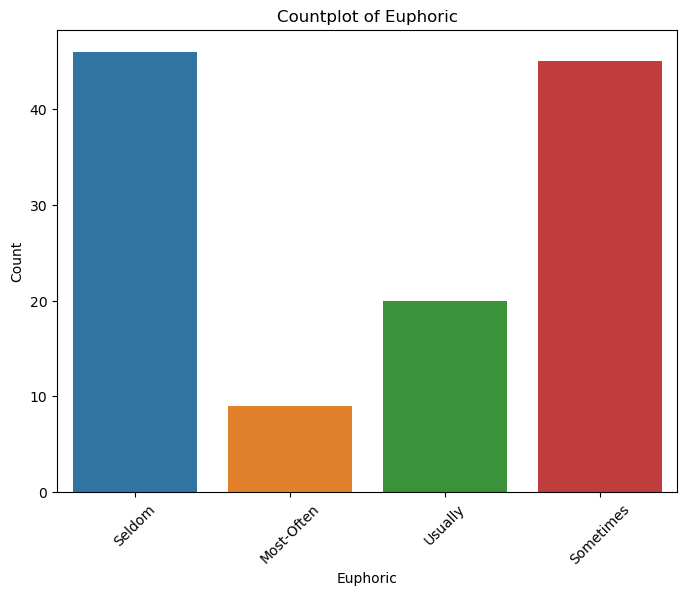

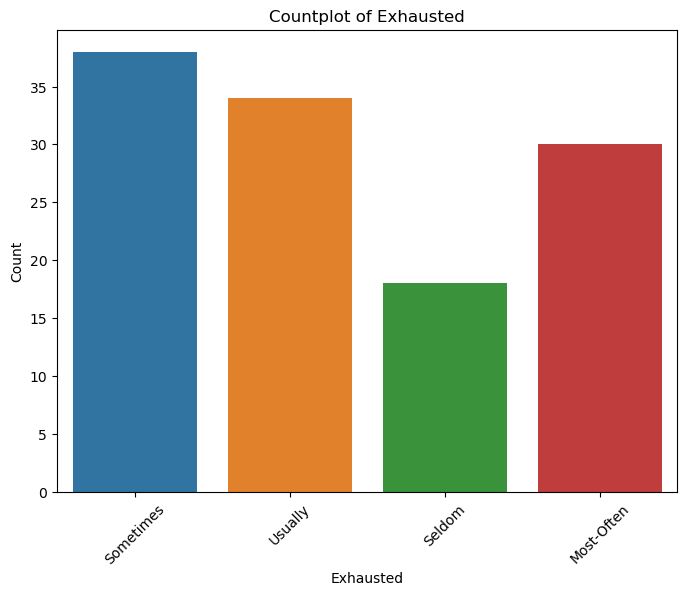

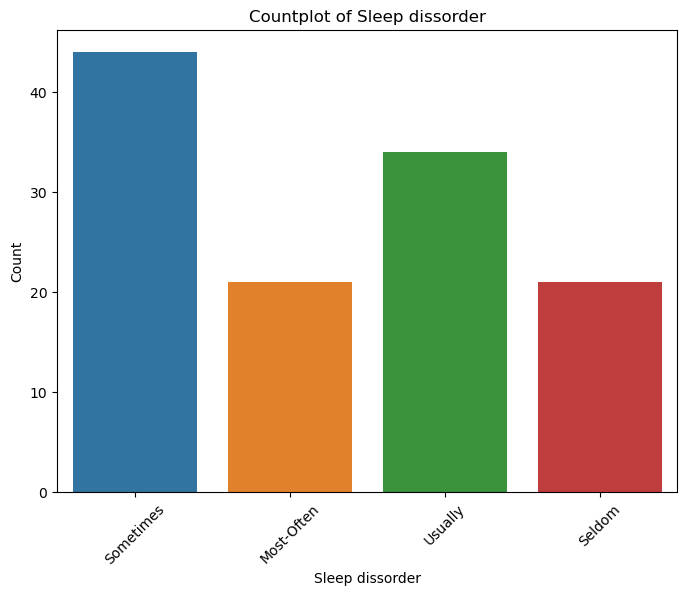

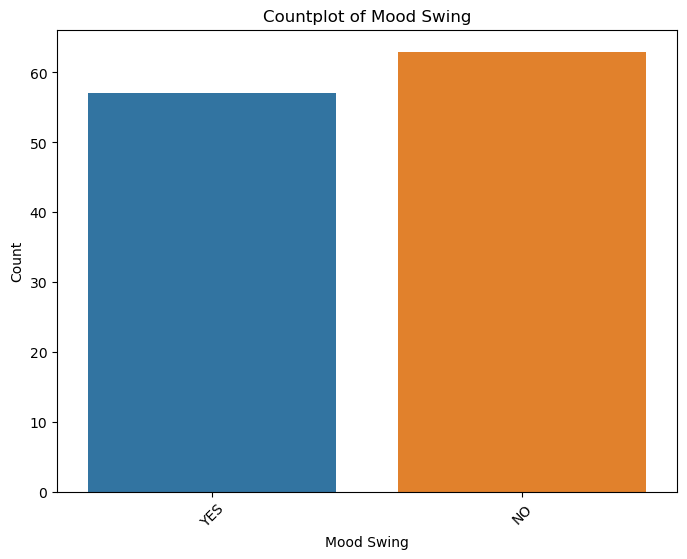

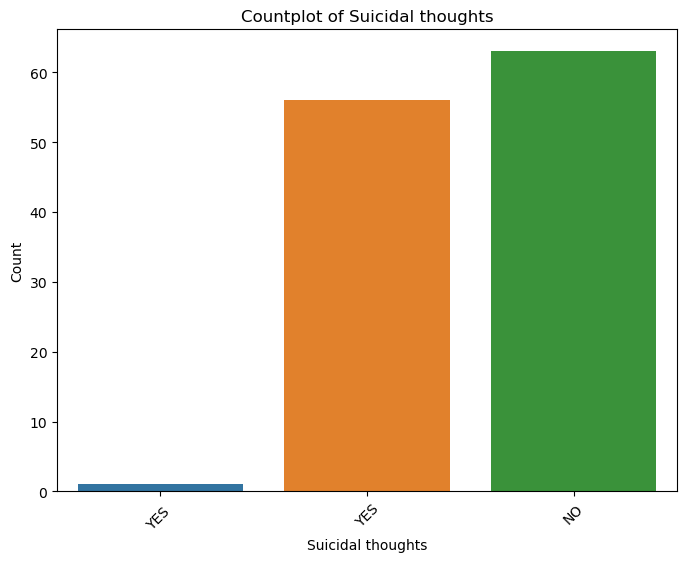

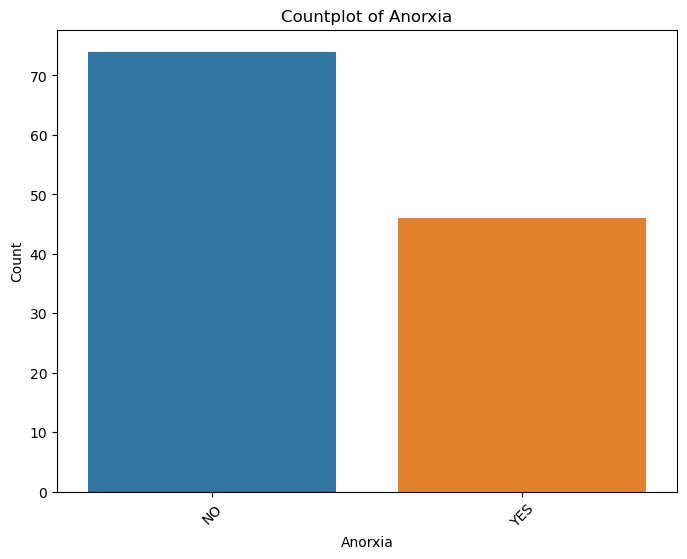

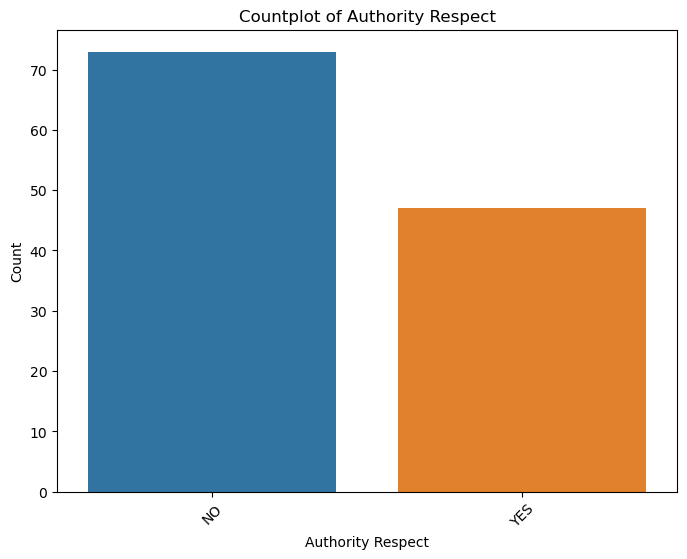

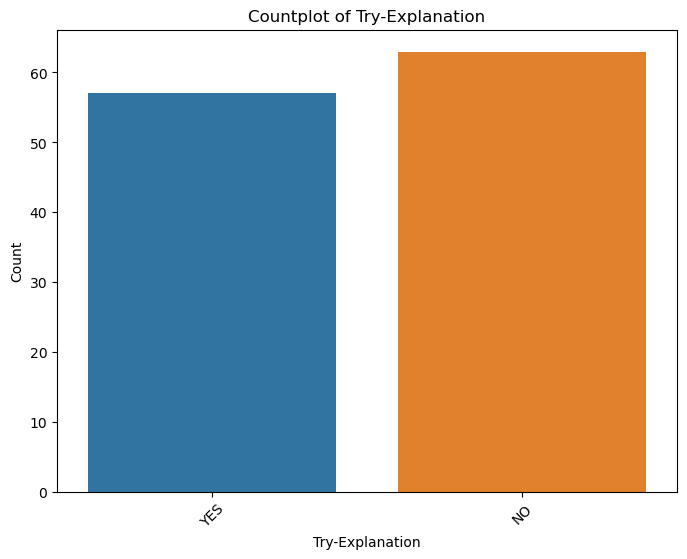

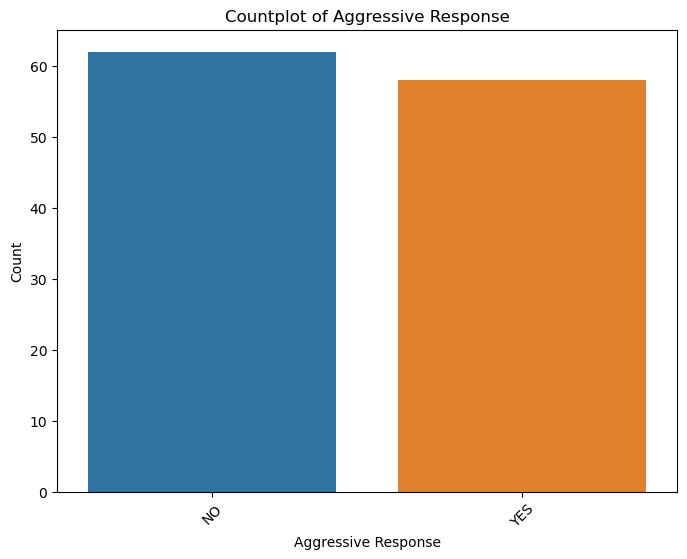

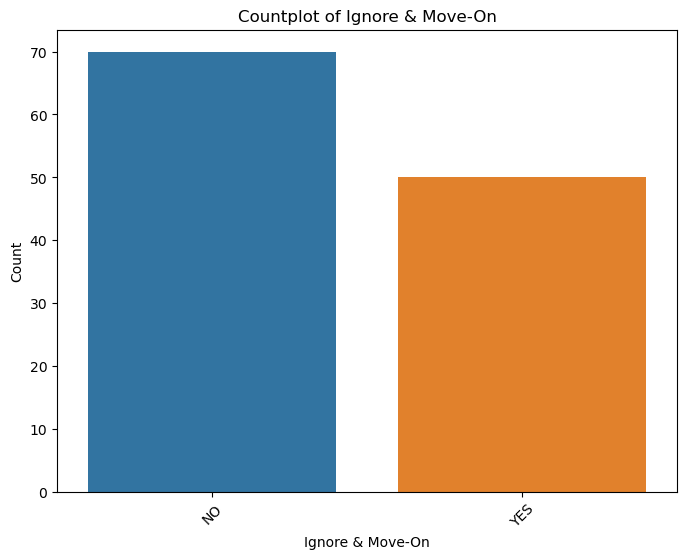

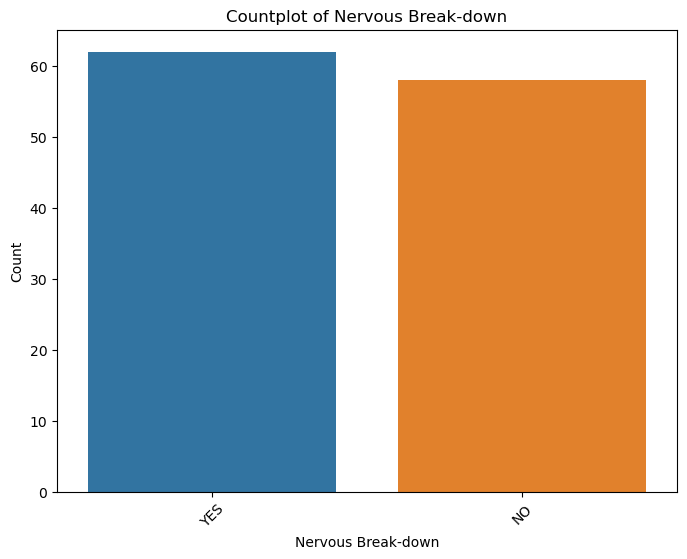

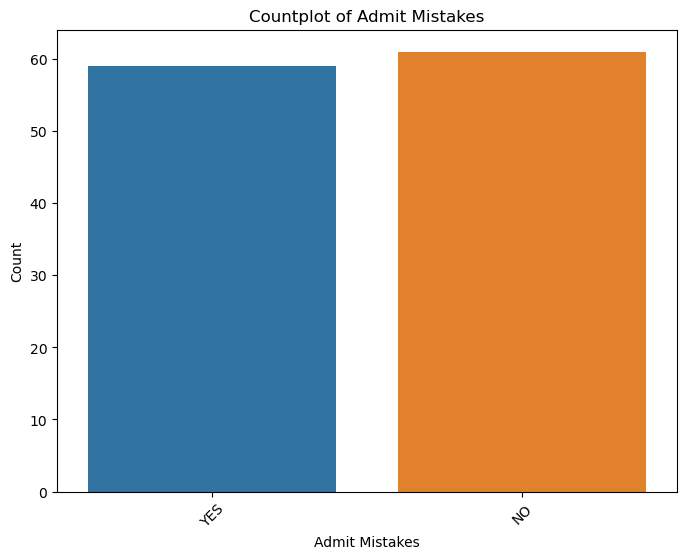

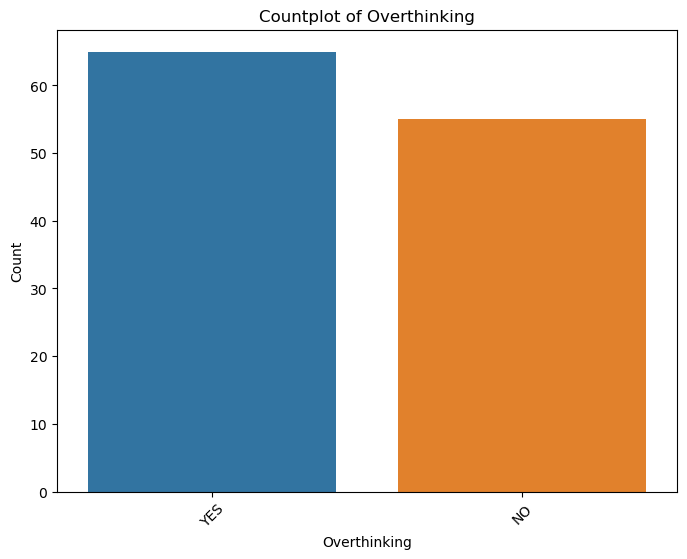

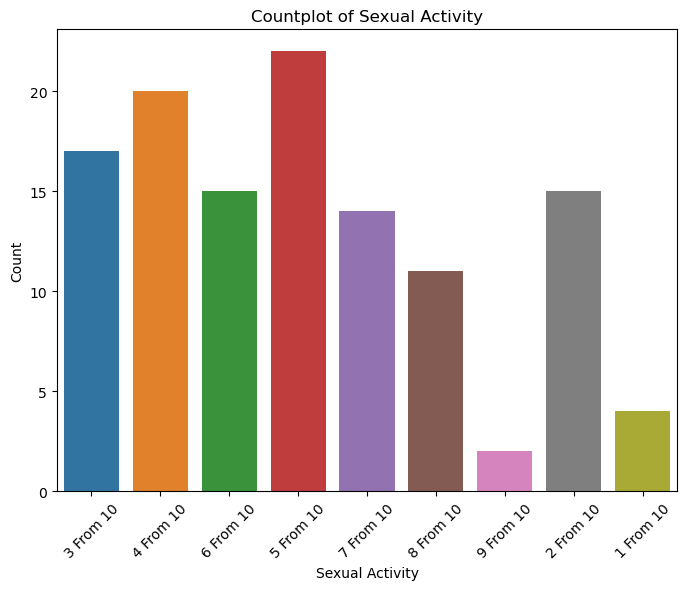

In [8]:
categorical_features = ['Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder', 
                        'Mood Swing', 'Suicidal thoughts', 'Anorxia', 'Authority Respect', 
                        'Try-Explanation', 'Aggressive Response', 'Ignore & Move-On', 
                        'Nervous Break-down', 'Admit Mistakes', 'Overthinking', 'Sexual Activity']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=feature)
    plt.title(f'Countplot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

### Distribution of Diagnoses (Pie Chart)


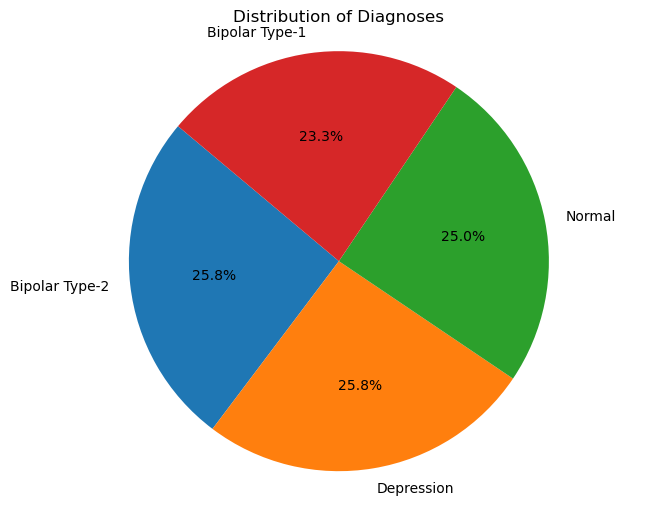

In [9]:
diagnose_counts = df['Expert Diagnose'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(diagnose_counts, labels=diagnose_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Diagnoses')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


### Cross-Tabulation Analysis of Categorical Features


In [10]:
import pandas as pd

for feature1 in categorical_features:
    for feature2 in categorical_features:
        if feature1 != feature2: 
            cross_tab = pd.crosstab(df[feature1], df[feature2])
            print(f"Cross-tabulation between {feature1} and {feature2}:")
            print(cross_tab)
            print("\n")


Cross-tabulation between Sadness and Euphoric:
Euphoric    Most-Often  Seldom  Sometimes  Usually
Sadness                                           
Most-Often           0      15          5        0
Seldom               3       1          4        8
Sometimes            6      11         15       10
Usually              0      19         21        2


Cross-tabulation between Sadness and Exhausted:
Exhausted   Most-Often  Seldom  Sometimes  Usually
Sadness                                           
Most-Often          10       1          2        7
Seldom               3       6          5        2
Sometimes            7       4         19       12
Usually             10       7         12       13


Cross-tabulation between Sadness and Sleep dissorder:
Sleep dissorder  Most-Often  Seldom  Sometimes  Usually
Sadness                                                
Most-Often                7       0          7        6
Seldom                    4       4          4        4
Sometimes  

### Heatmap of Cross-Tabulation Analysis for Categorical Features


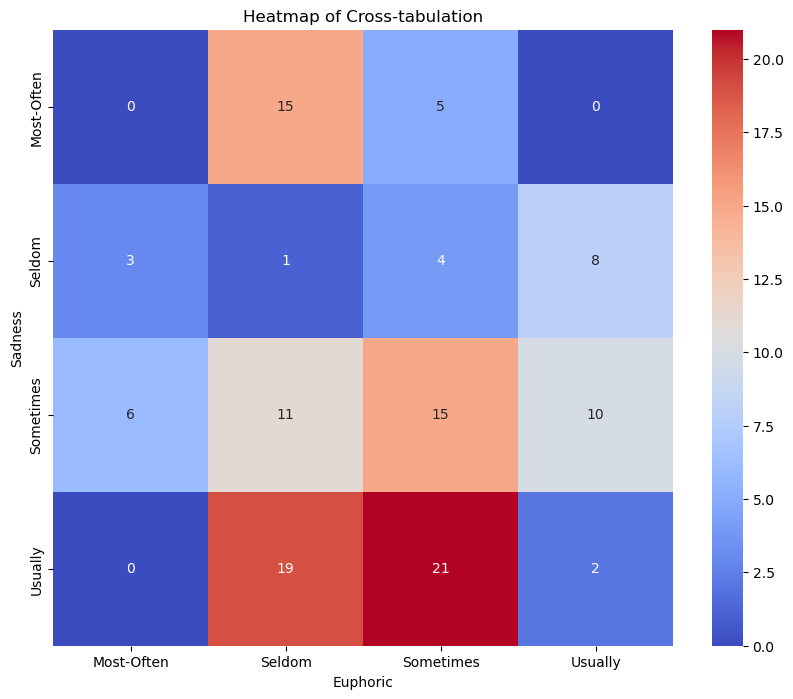

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

if len(categorical_features) >= 2:
    cross_tab_matrix = pd.crosstab(df[categorical_features[0]], df[categorical_features[1]])
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cross_tab_matrix, cmap='coolwarm', annot=True, fmt='d')
    plt.title('Heatmap of Cross-tabulation')
    plt.xlabel(categorical_features[1])
    plt.ylabel(categorical_features[0])
    plt.show()
else:
    print("Insufficient categorical features to create cross-tabulation heatmap.")


### KMeans Clustering Analysis


c:\application\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\application\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster Centers:
   Concentration  Optimism
0       3.306122  2.693878
1       6.400000  4.971429
2       3.444444  6.388889




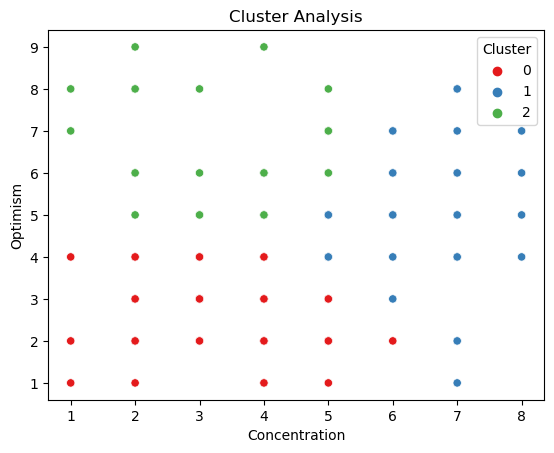

In [12]:
import pandas as pd
from sklearn.cluster import KMeans

for feature in numerical_features:
    df[feature] = df[feature].astype(str)

for feature in numerical_features:
    df[feature] = df[feature].str.extract('(\d+)').astype(float)

df.dropna(inplace=True)

kmeans = KMeans(n_clusters=3)
kmeans.fit(df[numerical_features])

df['Cluster'] = kmeans.labels_

cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=numerical_features)
print("Cluster Centers:")
print(cluster_centers)
print("\n")

sns.scatterplot(data=df, x=numerical_features[0], y=numerical_features[1], hue='Cluster', palette='Set1')
plt.title('Cluster Analysis')
plt.xlabel(numerical_features[0])
plt.ylabel(numerical_features[1])
plt.show()


### Effect of Categorical Features on Diagnoses


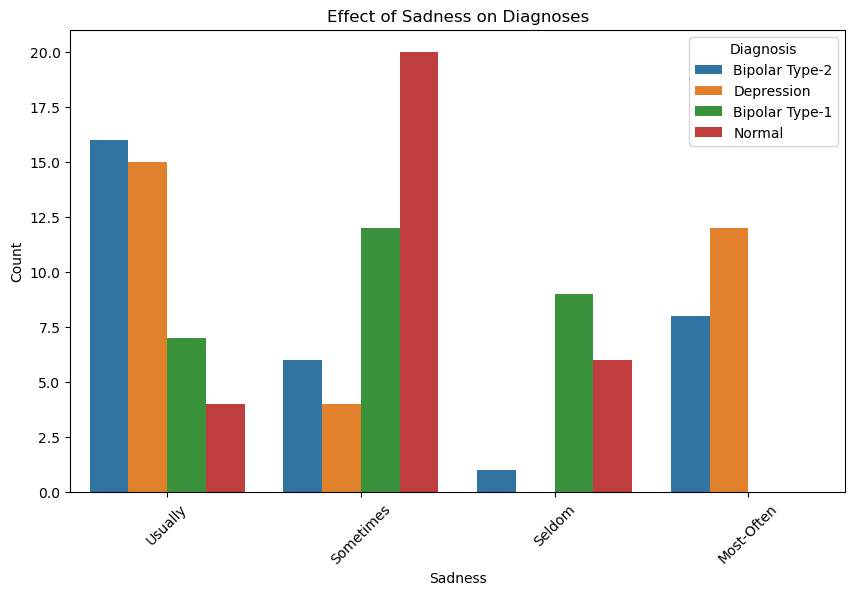

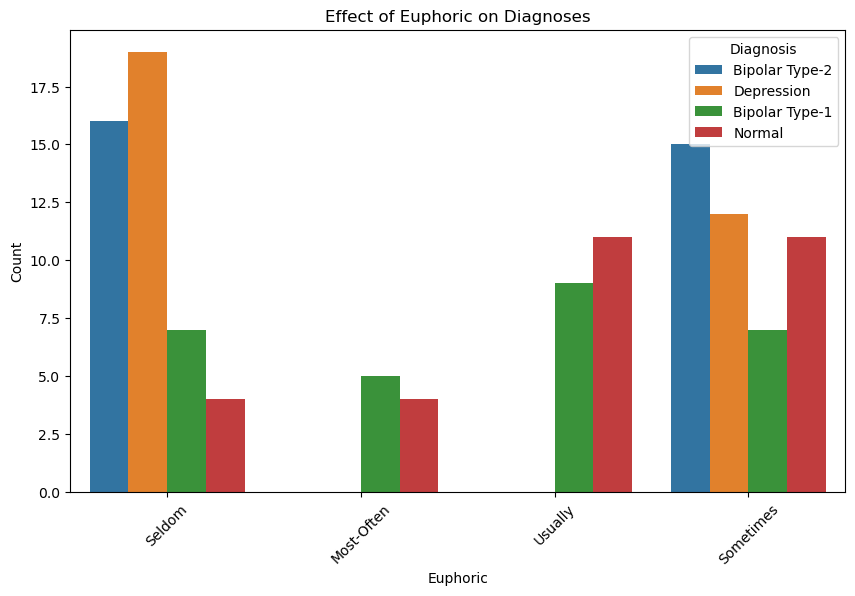

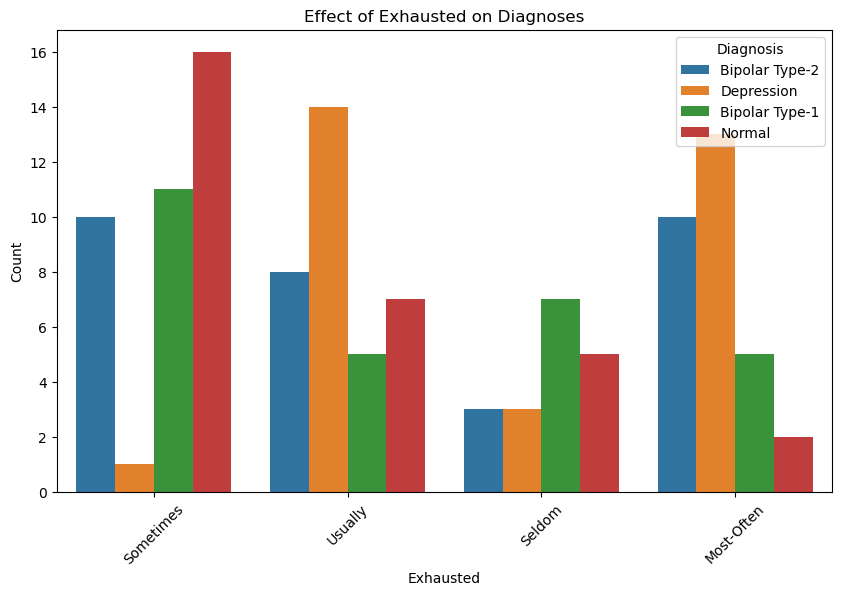

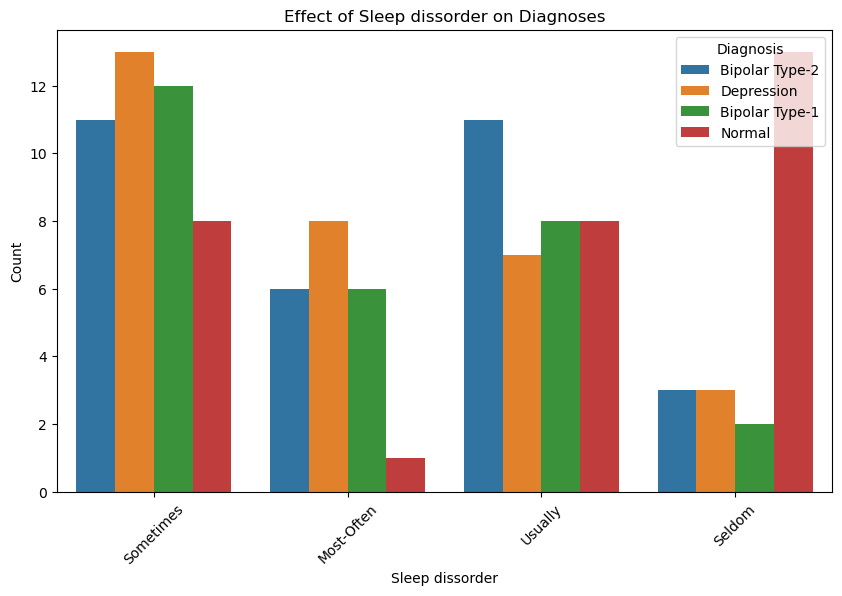

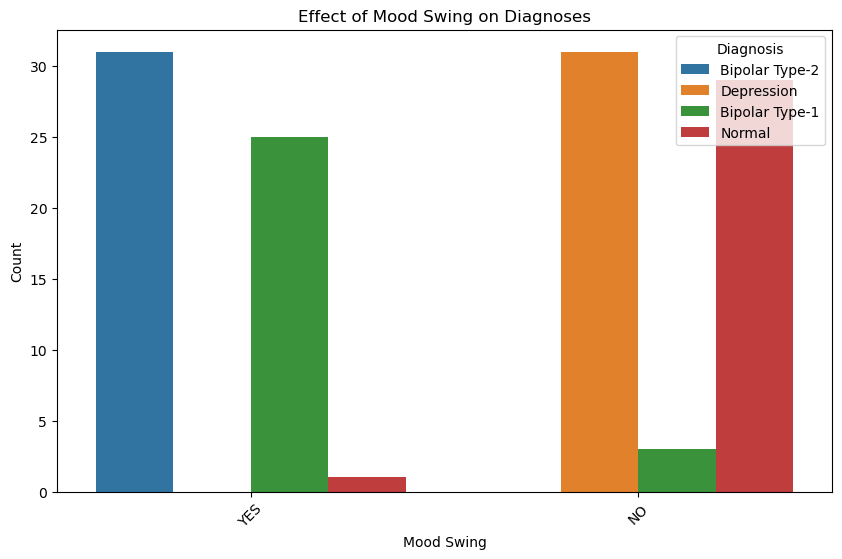

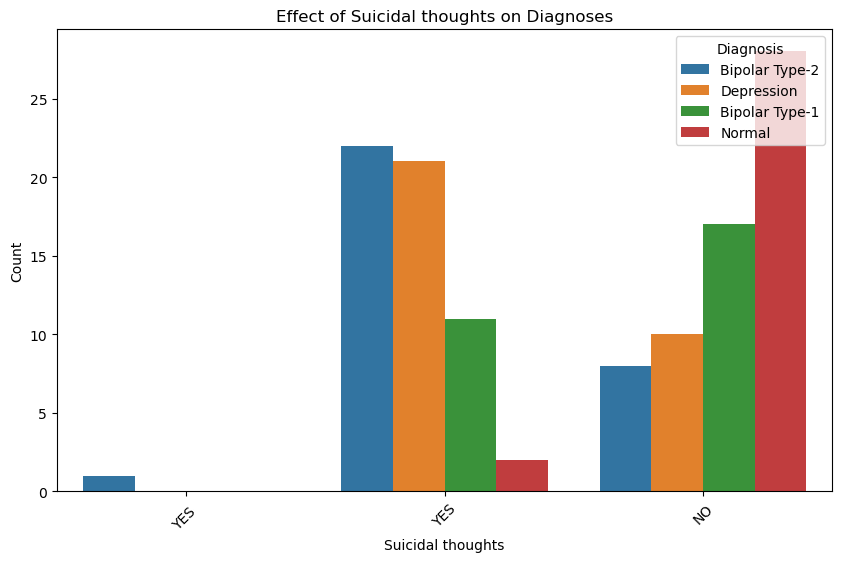

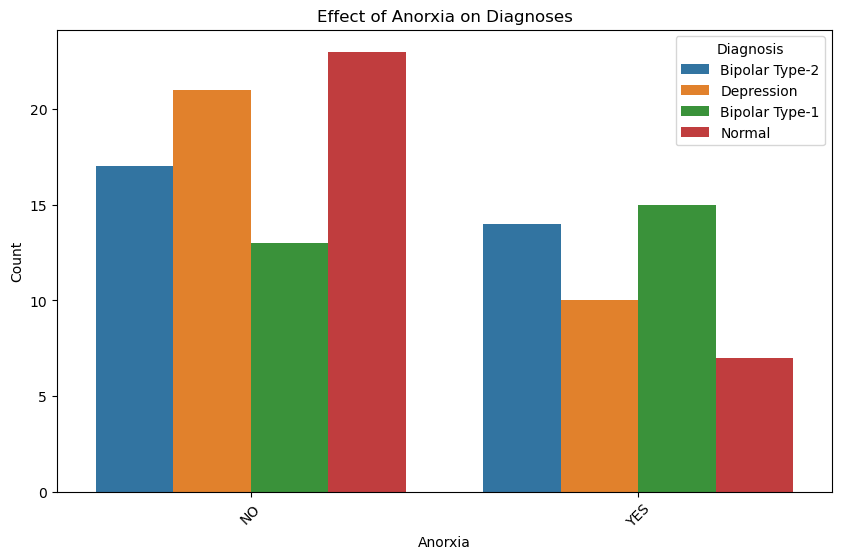

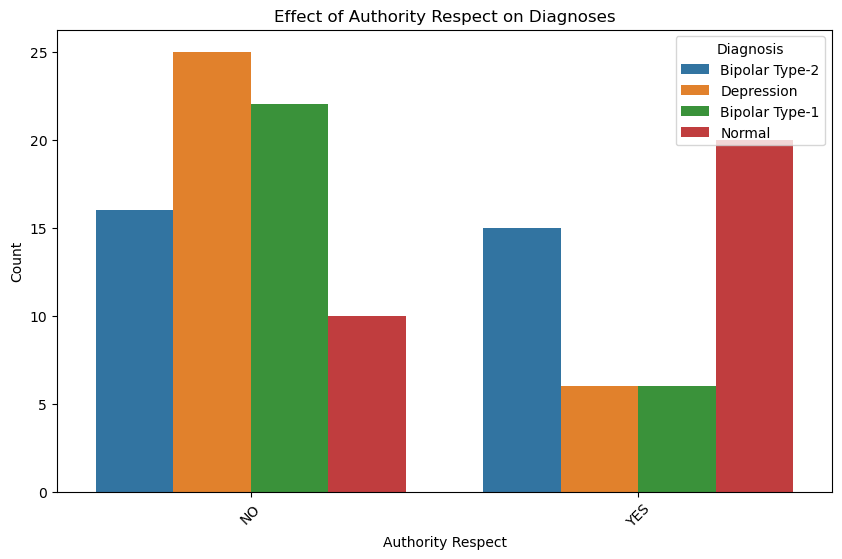

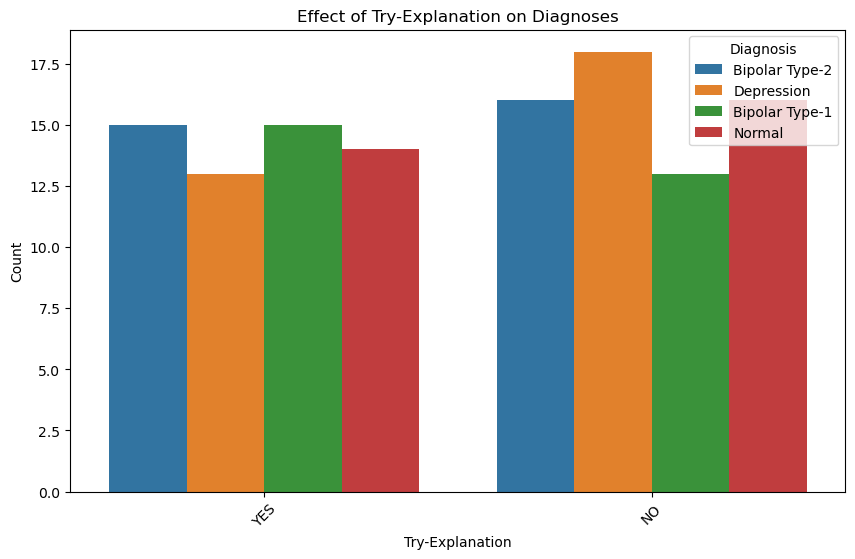

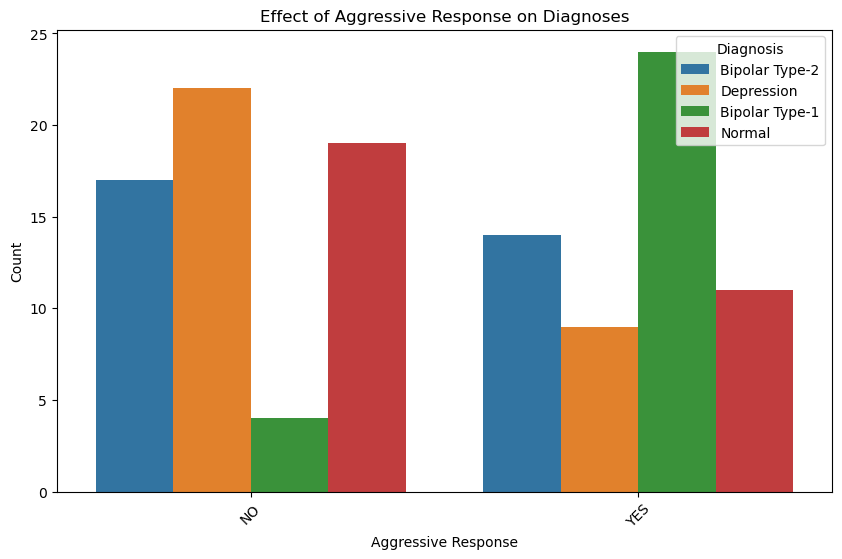

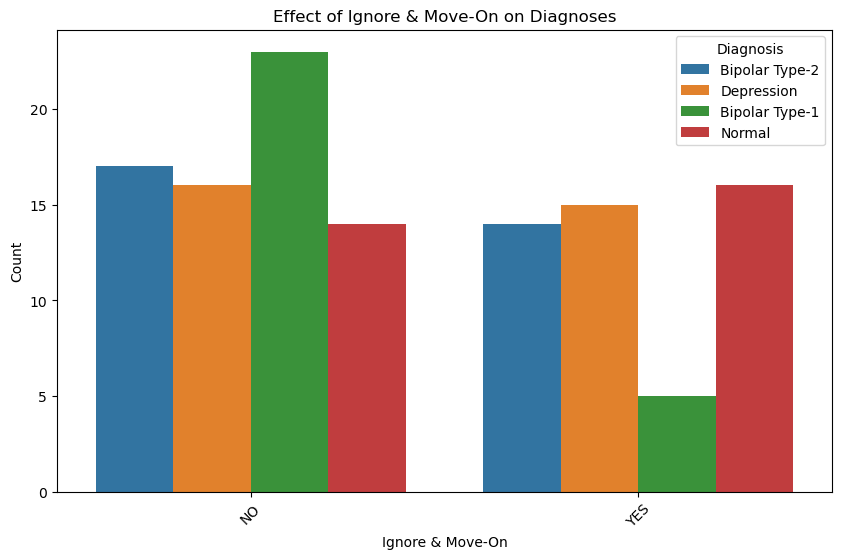

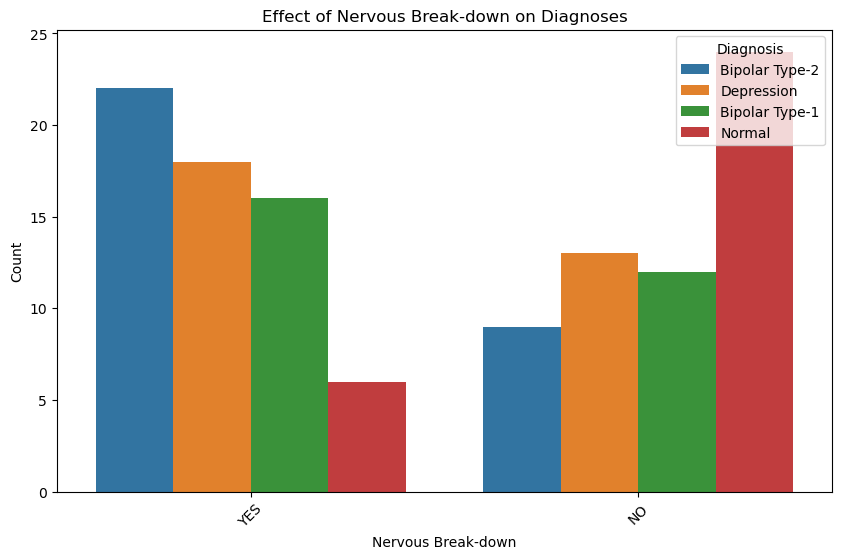

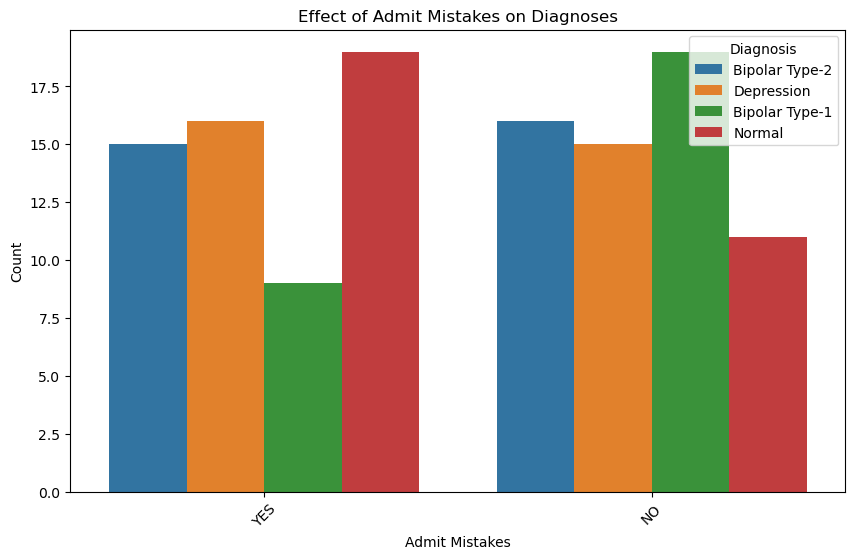

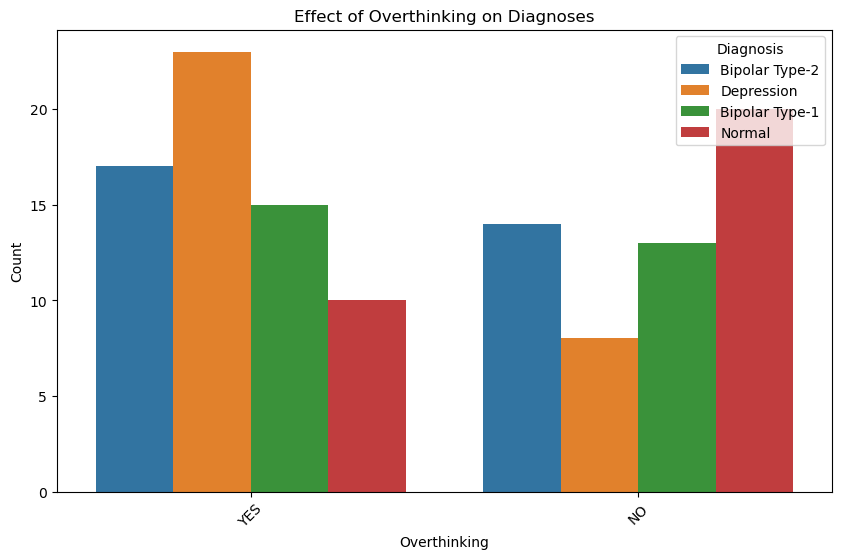

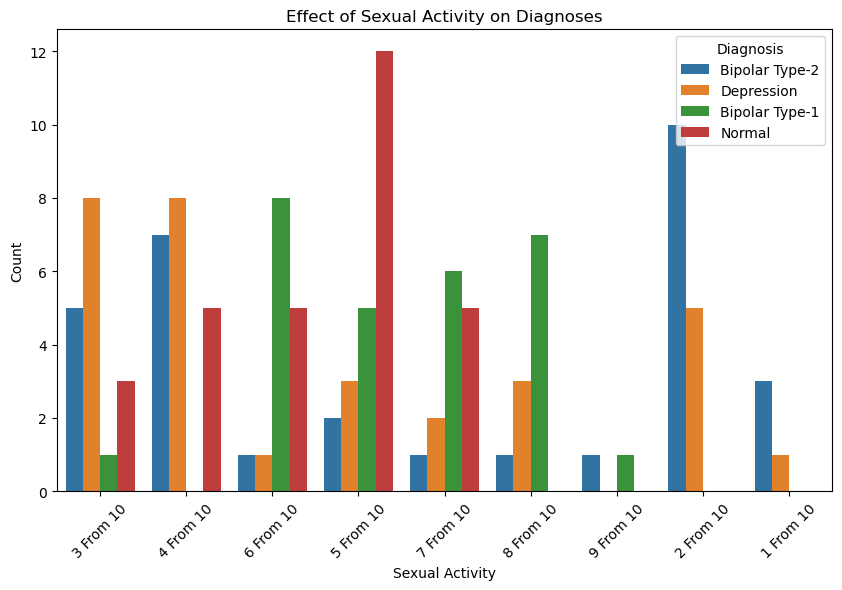

In [13]:
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=feature, hue='Expert Diagnose')
    plt.title(f'Effect of {feature} on Diagnoses')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Diagnosis', loc='upper right')
    plt.show()
